# Expecting Life Expectancy
*Modeling Life Expectancy using Linear Regression*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")

## Data wrangling and cleaning

Source:
https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [ ]:
# Import data from Kaggle
df = pd.read_csv("data/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.columns.to_list()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [ ]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### 1. Data cleaning

In [ ]:
# Drop country, encode 'Status'

raw_data = df.copy() #Create copy of raw data

df.drop(['Country'], axis=1, inplace=True)

df = pd.get_dummies(df, columns=['Status'], drop_first=True)

df.head()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [ ]:
raw_data.shape

(2938, 22)

In [ ]:
# Check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2385 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2904 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2919 non-null   float64
 11  Total expenditure                2712 non-null   float64
 12  Diphtheria          

In [ ]:
# Because missing values in population apply to only certain countries, we will delete these rows

df.dropna(how='all', inplace=True)
df.dropna(subset=['Population'], inplace=True)

df.shape

(2286, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2286 non-null   int64  
 1   Life expectancy                  2284 non-null   float64
 2   Adult Mortality                  2284 non-null   float64
 3   infant deaths                    2286 non-null   int64  
 4   Alcohol                          2130 non-null   float64
 5   percentage expenditure           2286 non-null   float64
 6   Hepatitis B                      1804 non-null   float64
 7   Measles                          2286 non-null   int64  
 8    BMI                             2254 non-null   float64
 9   under-five deaths                2286 non-null   int64  
 10  Polio                            2267 non-null   float64
 11  Total expenditure                2131 non-null   float64
 12  Diphtheria          

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
count,2286.000000,2284.000000,2284.000000,2286.000000,2130.000000,2286.000000,1804.000000,2286.000000,2254.000000,2286.000000,...,2131.000000,2267.000000,2286.000000,2264.000000,2.286000e+03,2254.000000,2254.000000,2285.000000,2286.000000,2286.000000
mean,2007.494313,68.685595,170.154116,34.082240,4.687695,831.307362,79.120288,2548.646982,37.493789,47.373578,...,6.009892,81.251875,2.055862,6628.839008,1.275338e+07,4.877019,4.937134,0.618676,11.860936,0.818023
std,4.608594,9.827899,128.996028,131.708501,4.050006,2164.729144,25.615235,11548.200909,19.902236,179.042015,...,2.378780,24.037878,5.646077,13536.349181,6.101210e+07,4.666797,4.764169,0.211339,3.443492,0.385910
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,...,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000
25%,2003.250000,62.200000,72.000000,0.000000,0.932500,20.863085,74.000000,0.000000,18.725000,1.000000,...,4.370000,77.000000,0.100000,435.661704,1.957932e+05,1.500000,1.500000,0.480000,9.825000,1.000000
50%,2007.000000,71.400000,146.000000,3.000000,4.050000,94.345833,89.000000,17.000000,42.100000,4.000000,...,5.880000,92.000000,0.100000,1521.980960,1.386542e+06,2.900000,3.100000,0.663000,12.100000,1.000000
75%,2011.000000,75.400000,237.000000,24.000000,7.530000,491.915892,96.000000,438.250000,55.800000,33.000000,...,7.700000,96.000000,1.200000,5178.561948,7.420359e+06,7.300000,7.400000,0.767000,14.300000,1.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,83.300000,2500.000000,...,16.610000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000


In [ ]:
# All other missing avlues will be filled with the average

for col in df.columns:
    print(np.mean(df[col]))
    df[col].fillna(np.mean(df[col]), inplace=True)

2007.4943132108485
68.68559544658497
170.15411558669
34.082239720035
4.687694835680765
831.3073619598144
79.12028824833703
2548.6469816272966
37.49378881987576
47.37357830271216
81.15924128804588
6.009892069450958
81.25187472430525
2.0558617672790627
6628.839007917581
12753375.120052498
4.8770186335403745
4.9371339840283905
0.6186757111597361
11.860936132983356
0.8180227471566054


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2286 non-null   int64  
 1   Life expectancy                  2286 non-null   float64
 2   Adult Mortality                  2286 non-null   float64
 3   infant deaths                    2286 non-null   int64  
 4   Alcohol                          2286 non-null   float64
 5   percentage expenditure           2286 non-null   float64
 6   Hepatitis B                      2286 non-null   float64
 7   Measles                          2286 non-null   int64  
 8    BMI                             2286 non-null   float64
 9   under-five deaths                2286 non-null   int64  
 10  Polio                            2286 non-null   float64
 11  Total expenditure                2286 non-null   float64
 12  Diphtheria          

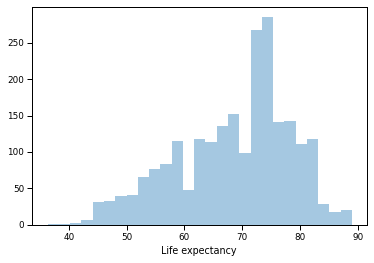

In [ ]:
#Vsualizing normality of target variable
ax = sns.distplot(df['Life expectancy '], kde=False)
ax.figure.savefig("target_raw.png")

In [ ]:
from scipy.stats import normaltest
from scipy.stats import boxcox

normaltest(df['Life expectancy '])

NormaltestResult(statistic=114.92878290476102, pvalue=1.1054316282165258e-25)

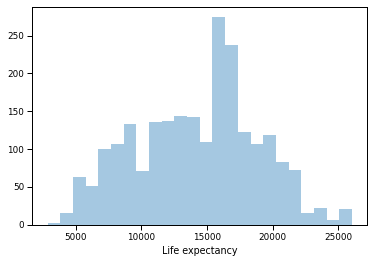

In [ ]:
# Use boxcox to better approach a normal distribution for target variable
bc_result = boxcox(df['Life expectancy '])
boxcox_medv = bc_result[0]
lam = bc_result[1]

#plt.hist(boxcox_medv);
ax = sns.distplot(boxcox_medv, kde=False)
ax.set_xlabel("Life expectancy")
ax.figure.savefig("target_norm.png")

In [ ]:
normaltest(boxcox_medv)

NormaltestResult(statistic=88.93233684183984, pvalue=4.881894876978099e-20)

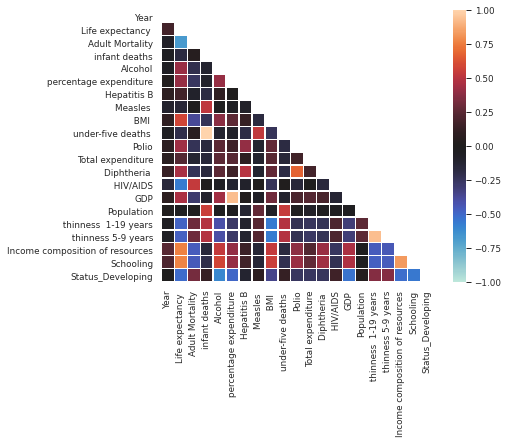

In [ ]:
# Correlation between variables
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, square=True, linewidths=.3, center=0, vmin=-1, vmax=1)
    
ax.figure.savefig("corr.png")

In [ ]:
# Drop some highly correlated variables
df.drop(axis=1, columns=['percentage expenditure', 'under-five deaths ', ' thinness 5-9 years'], inplace=True)
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling,Status_Developing
0,2015,65.0,263.0,62,0.01,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1,1
1,2014,59.9,271.0,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0,1
2,2013,59.9,268.0,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9,1
3,2012,59.5,272.0,69,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8,1
4,2011,59.2,275.0,71,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5,1


## Regression Modeling & Evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create X and y
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

### 1. Linear Regression

In [ ]:
# Standard LR

kf = KFold(shuffle=True, random_state=72018, n_splits=10)

estimator = Pipeline([("scaler", StandardScaler()),
                      ("regression", LinearRegression())])

y_predict = cross_val_predict(estimator, X, y, cv=kf)


In [ ]:
r2_score(y, y_predict)

0.8369107472321646

### 2. Polynomial Regression

In [ ]:
# Stanrdard LR with poly features

kf = KFold(shuffle=True, random_state=72018, n_splits=10)

estimator = Pipeline([("scaler", StandardScaler()),
                      ("polynomial_features", PolynomialFeatures(degree=2)),
                      ("regression", LinearRegression())])

y_predict = cross_val_predict(estimator, X, y, cv=kf)

In [ ]:
r2_score(y, y_predict)

0.9164936572171775

### 3. Regularization w/ Ridge and LASSO

In [ ]:
# Create pipeline with:
# 1. Standard scaking
# 2. Poly features
# 3. Ridge

kf = KFold(shuffle=True, random_state=72018, n_splits=10)

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(.1, 50, 40)
}

grid = GridSearchCV(estimator, params, cv=kf, verbose=1)


In [ ]:
grid.fit(X, y)
grid.best_score_, grid.best_params_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.5min finished


(0.9197520511611416,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 19.219578092622115})

In [ ]:
# Create pipeline with:
# 1. Standard scaking
# 2. Poly features
# 3. LASSO

kf = KFold(shuffle=True, random_state=72018, n_splits=10)

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso(max_iter=220000))])

params = {
    'polynomial_features__degree': [1, 2],
    'lasso_regression__alpha': np.geomspace(0.001, 0.5, 20)
}

grid = GridSearchCV(estimator, params, cv=kf, verbose=1)

In [ ]:
grid.fit(X, y)
grid.best_score_, grid.best_params_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  2.0min finished


(0.9209046588994427,
 {'lasso_regression__alpha': 0.013690156816728805,
  'polynomial_features__degree': 2})

In [ ]:
features = X.columns.to_list()

In [ ]:
from sklearn.model_selection import train_test_split

pf = PolynomialFeatures(degree= grid.best_params_['polynomial_features__degree'], include_bias=False)

X_pf = pf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=34017)

In [ ]:
lasso = Lasso(alpha= grid.best_params_['lasso_regression__alpha'], max_iter=200000)

std = StandardScaler()

X_train_s = std.fit_transform(X_train)
lasso.fit(X_train_s, y_train)

Lasso(alpha=0.013690156816728805, max_iter=200000)

In [ ]:
X_test_s = std.transform(X_test)

y_predict = lasso.predict(X_test_s)

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.9103952186305734

In [ ]:
pf_features = pf.get_feature_names(input_features=features)
pd.DataFrame(zip(pf_features, lasso.coef_)).sort_values(by=1)

,0,1
34,Adult Mortality^2,-6.336391
10,HIV/AIDS,-4.010608
165,Income composition of resources Schooling,-3.302546
113,BMI Schooling,-2.563116
112,BMI Income composition of resources,-1.464891
...,...,...
15,Schooling,2.410479
43,Adult Mortality HIV/AIDS,3.737028
1,Adult Mortality,4.119912
6,BMI,4.143132


In [ ]:
print('sum of coefficients:', abs(lasso.coef_).sum())
print('number of coefficients equal to 0:', (lasso.coef_==0).sum())
print('number of coefficients not equal to 0:', (lasso.coef_!=0).sum())

sum of coefficients: 68.76000868793412
number of coefficients equal to 0: 96
number of coefficients not equal to 0: 74


In [ ]:
# Distribution of errors
normaltest((y_test - y_predict))

NormaltestResult(statistic=64.98852707014652, pvalue=7.72539427130034e-15)